[[ 16  15  14]
 [ 16  15  15]
 [ 16  15  16]
 ...
 [110 109 106]
 [110 109 107]
 [110 109 108]]
(53018, 3)


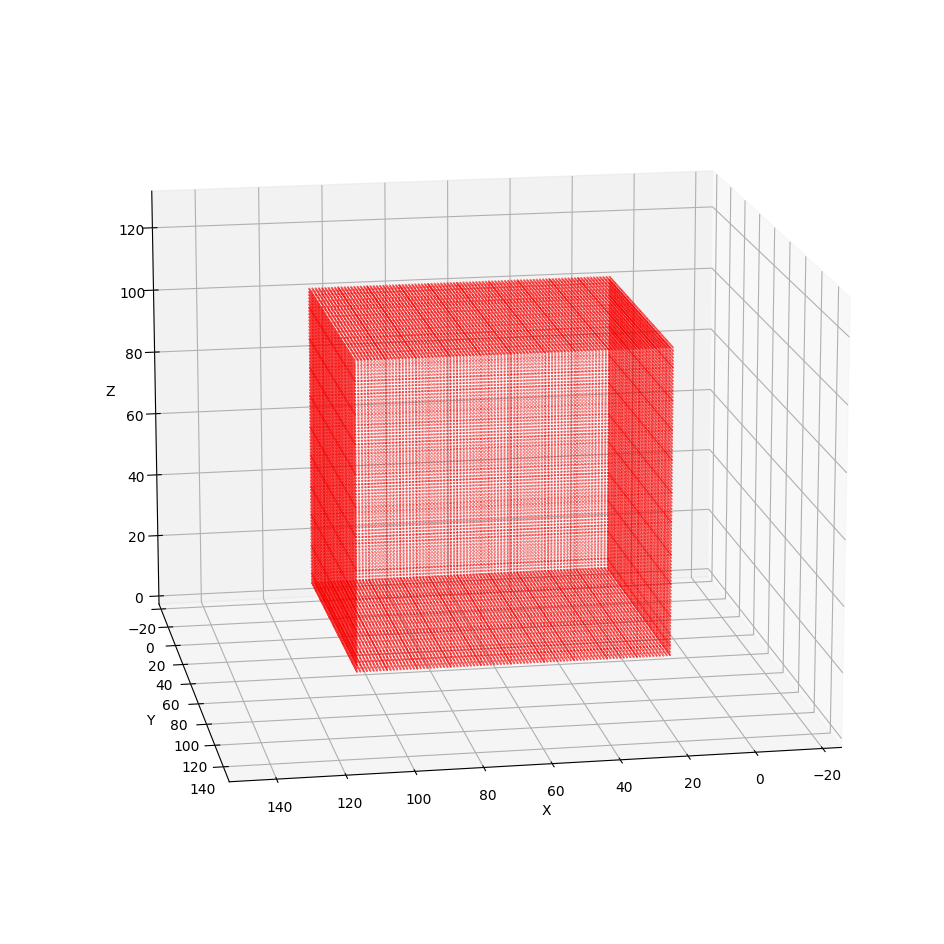

In [8]:
#取得した座標データを表示
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



b = np.loadtxt('C:/Users/kanta/desktop/choten/rippou.txt', delimiter=',')
b = np.delete(b, 0, axis=1)

X1 = b[:,0]
Y1 = b[:,1]
Z1 = b[:,2]

X1 = np.round(X1)
Y1 = np.round(Y1)
Z1 = np.round(Z1)

virtex = np.vstack((X1, Y1))
virtex = np.vstack((virtex, Z1))
virtex = virtex.T
virtex = np.unique(virtex, axis=0)
virtex = virtex.astype(np.int16)
print(virtex)
print(virtex.shape)

coordinates = virtex

np.savetxt('C:/Users/kanta/Desktop/game/keiro2/rippou.txt', virtex, fmt='%d', delimiter=',')

# Figureを追加
fig = plt.figure(figsize = (12, 12))

# 3DAxesを追加
ax = fig.add_subplot(projection='3d')

# Axesのタイトルを設定
ax.set_title("", size = 20)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_xlim(0,128)
ax.set_ylim(0,128)
ax.set_zlim(0,129)
#ax.scatter(X0, Y0, Z0, s = 0.1, c = "blue", alpha = 0.1)
ax.scatter(X1, Y1, Z1, s = 0.05, c = "red", alpha = 0.3)
ax.view_init(elev=15, azim=80)
ax.set_aspect('equal')
ax.axis("on")

plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_coordinates(cube_size):
    coordinates = []
    offset = cube_size / 2
    for x in range(0, cube_size + 1):
        for y in range(0, cube_size + 1):
            for z in range(0, cube_size + 1):
                if x == 0 or x == cube_size or y == 0 or y == cube_size or z == 0 or z == cube_size:
                    coordinates.append((x - offset, y - offset, z - offset))
    return np.array(coordinates)

n = 20
coordinates = generate_coordinates(n)
print(coordinates)

[[-10. -10. -10.]
 [-10. -10.  -9.]
 [-10. -10.  -8.]
 ...
 [ 10.  10.   8.]
 [ 10.  10.   9.]
 [ 10.  10.  10.]]


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 整数座標の点を生成
def generate_coordinates_sphere(radius_approx):
    coords = np.array(np.meshgrid(
        np.arange(-radius_approx, radius_approx + 1),
        np.arange(-radius_approx, radius_approx + 1),
        np.arange(-radius_approx, radius_approx + 1)
    )).T.reshape(-1, 3)

    points = coords[((radius_approx - 1) ** 2 <= np.sum(coords ** 2, axis=1)) & (np.sum(coords ** 2, axis=1) <= (radius_approx + 1) ** 2)]
    #points += radius_approx
    return points

coordinates = generate_coordinates_sphere(10)
print(coordinates)
print(coordinates.shape)

[[ -4  -2 -10]
 [ -4  -1 -10]
 [ -4   0 -10]
 ...
 [  4   0  10]
 [  4   1  10]
 [  4   2  10]]
(2600, 3)


Time taken for greedy_path function: 3.1097 seconds


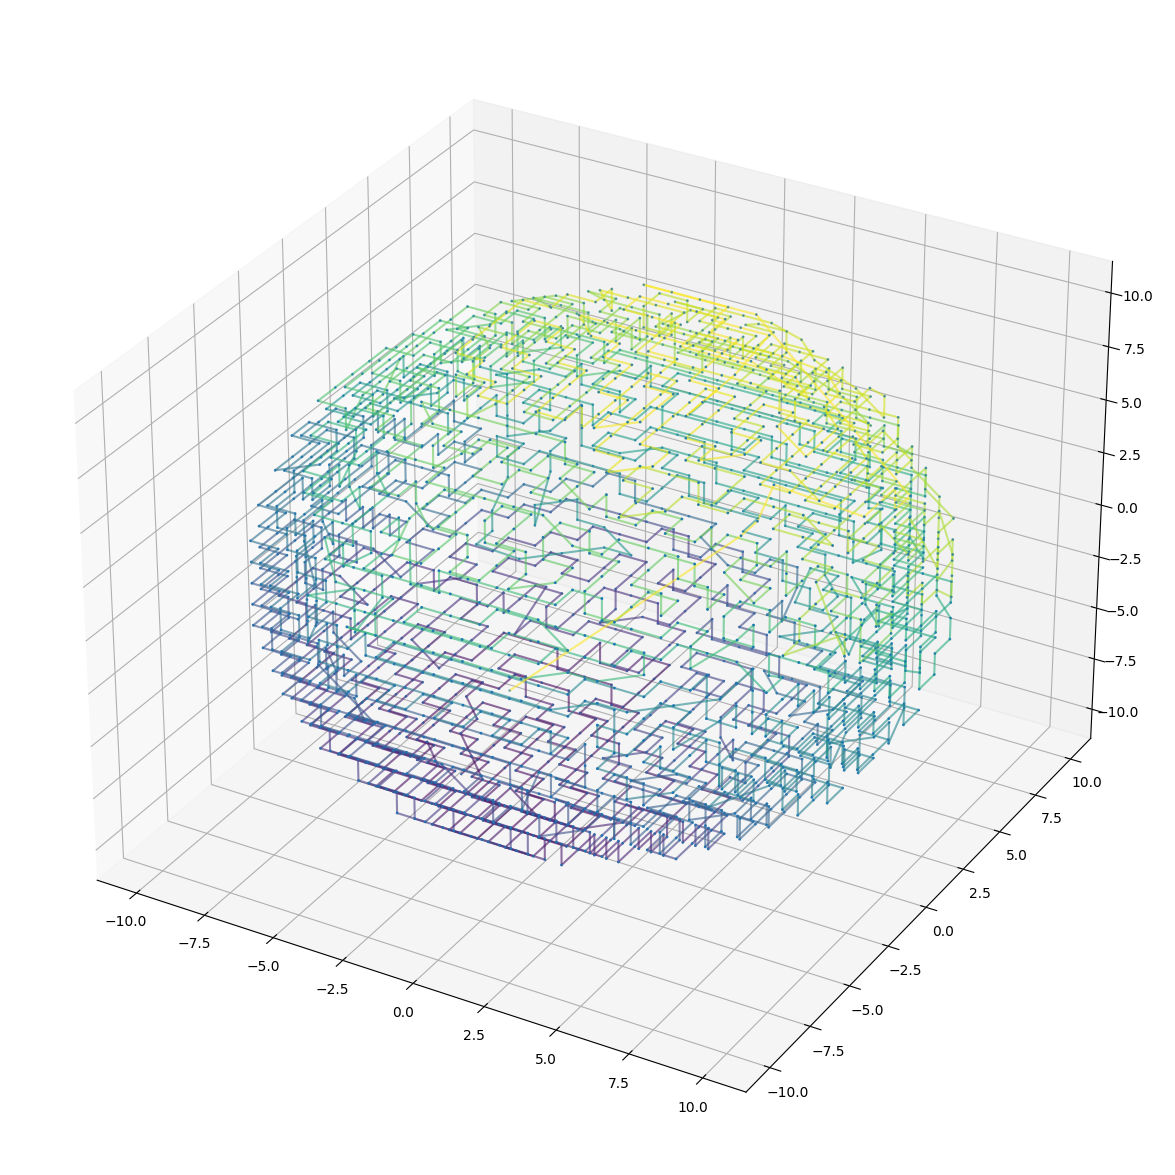

2723.3886695961196


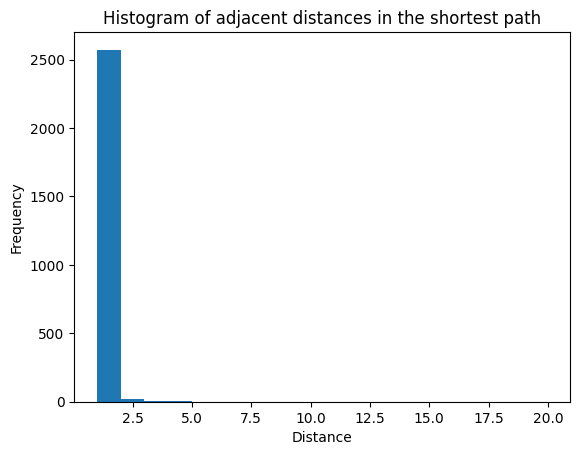

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time


def generate_coordinates(cube_size):
    coordinates = []
    offset = cube_size / 2
    for x in range(0, cube_size + 1):
        for y in range(0, cube_size + 1):
            for z in range(0, cube_size + 1):
                if x == 0 or x == cube_size or y == 0 or y == cube_size or z == 0 or z == cube_size:
                    coordinates.append((x - offset, y - offset, z - offset))
    return np.array(coordinates)

# 二点間の距離を計算する関数
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def greedy_path(coordinates, s):
    unvisited = set(range(len(coordinates)))
    current = 0
    path = [current]
    unvisited.remove(current)
    
    while unvisited:
        min_distance = float('inf')
        nearest_neighbor = None
        for neighbor in unvisited:
            dist = distance(coordinates[current], coordinates[neighbor])
            if dist <= s:
                nearest_neighbor = neighbor
                break
            elif dist < min_distance:
                min_distance = dist
                nearest_neighbor = neighbor
                
        current = nearest_neighbor
        path.append(current)
        unvisited.remove(current)
        #print(path)
    return path

# グラフ上の経路をプロットする関数
def plot_path(path, coordinates):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')

    # 頂点をプロット
    xs, ys, zs = coordinates[:, 0], coordinates[:, 1], coordinates[:, 2]
    ax.scatter(xs, ys, zs, s = 1)

     # 経路をプロット
    n = len(path) - 1
    cmap = plt.cm.get_cmap("viridis") # カラーマップを選択

    for i in range(n):
        color = cmap(i / n) # 現在の経路に応じて色を変更
        ax.plot([coordinates[path[i]][0], coordinates[path[i + 1]][0]],
                [coordinates[path[i]][1], coordinates[path[i + 1]][1]],
                [coordinates[path[i]][2], coordinates[path[i + 1]][2]], color=color, alpha=0.6)

    # グラフを表示
    plt.show()

# 隣り合う二点間の距離を計算する関数
def adjacent_distances(path, coordinates):
    distances = []
    for i in range(len(path) - 1):
        distances.append(distance(coordinates[path[i]], coordinates[path[i + 1]]))
    return distances

# ヒストグラムをプロットする関数
def plot_histogram(distances):
    #hist, bins = np.histogram(distances, bins=np.arange(min(distances), max(distances) + 1))
    # ヒストグラムを表示
    plt.hist(distances, bins=np.arange(min(distances), max(distances) + 1))

    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title('Histogram of adjacent distances in the shortest path')
    plt.show()

s = 1
n = 10

# 座標データを生成
#coordinates = generate_coordinates(n)
coordinates = generate_coordinates_sphere(n)
# 貪欲法で最短経路を求める
start_time = time.time()  # 時間計測開始
path = greedy_path(coordinates,s)
end_time = time.time()  # 時間計測終了
elapsed_time = end_time - start_time  # 経過時間を計算
print(f"Time taken for greedy_path function: {elapsed_time:.4f} seconds")  # 経過時間を表示
# 経路をプロット
plot_path(path, coordinates)
# 隣り合う二点間の距離を計算
distances = adjacent_distances(path, coordinates)
print(np.sum(distances))
# ヒストグラムをプロット
plot_histogram(distances)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 87, 86, 85, 84, 83, 82, 81, 80, 79, 78, 77, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 160, 149, 147, 145, 143, 141, 139, 137, 135, 133, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122, 121, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 199, 198, 197, 196, 195, 194, 193, 192, 191, 190, 188, 186, 184, 182, 180, 178, 176, 174, 172, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 200, 240, 229, 227, 225, 223, 221, 219, 217, 215, 213, 211, 210, 209, 208, 207, 206, 205, 204, 203, 202, 201,

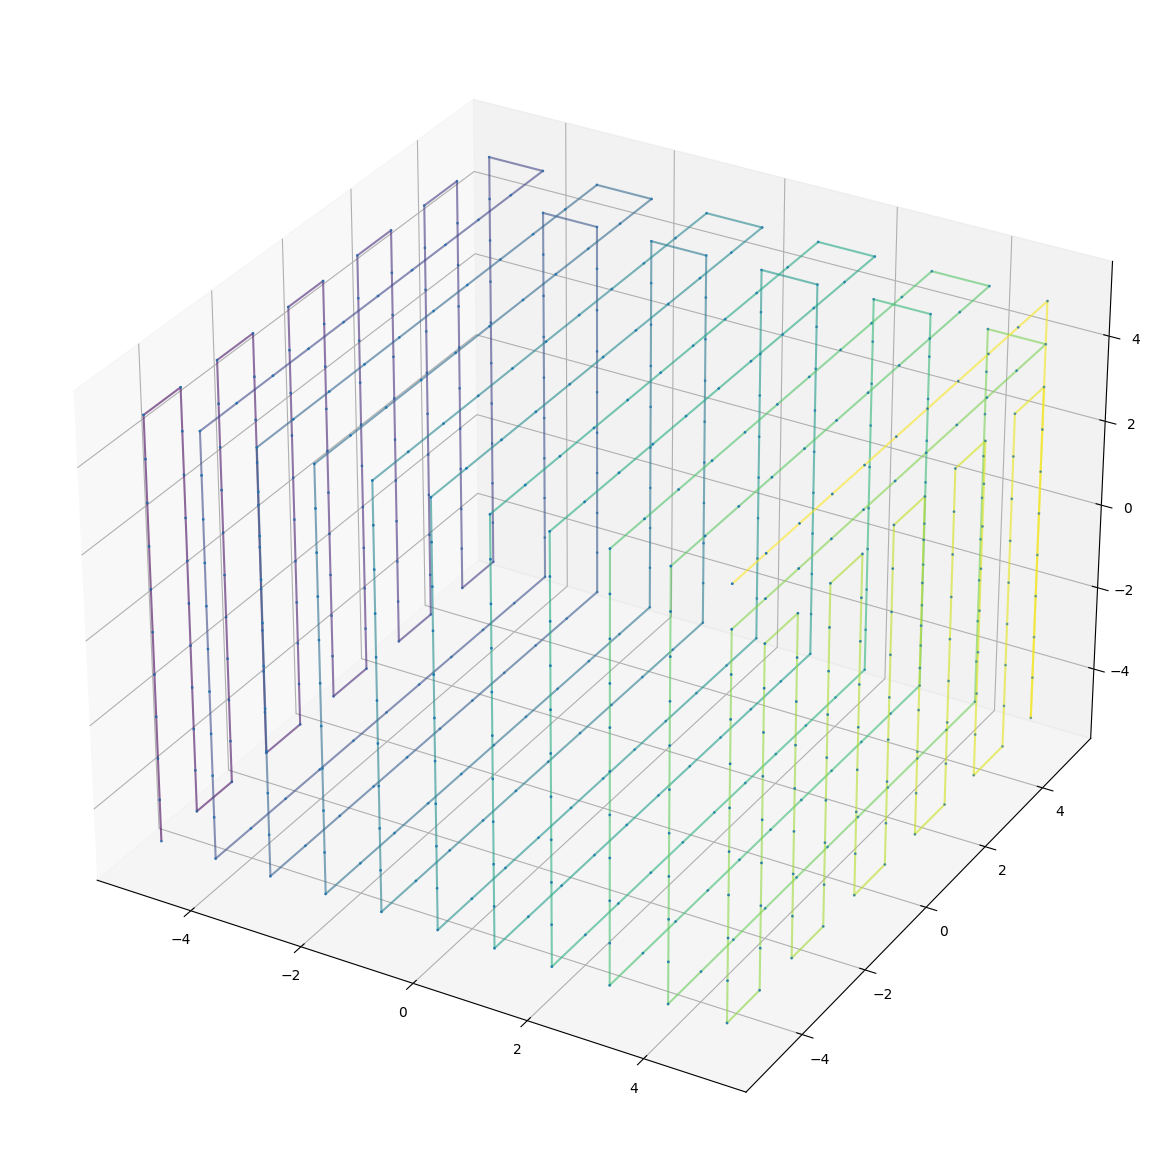

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time


def generate_coordinates(cube_size=n):
    coordinates = []
    offset = cube_size / 2
    for x in range(0, cube_size + 1):
        for y in range(0, cube_size + 1):
            for z in range(0, cube_size + 1):
                if x == 0 or x == cube_size or y == 0 or y == cube_size or z == 0 or z == cube_size:
                    coordinates.append((x - offset, y - offset, z - offset))
    return np.array(coordinates)

# 二点間の距離を計算する関数
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

def greedy_path(coordinates, s):
    unvisited = set(range(len(coordinates)))
    current = 0
    path = [current]
    unvisited.remove(current)
    
    while unvisited:
        min_distance = float('inf')
        nearest_neighbor = None
        for neighbor in unvisited:
            dist = distance(coordinates[current], coordinates[neighbor])
            if dist <= s:
                nearest_neighbor = neighbor
                break
            elif dist < min_distance:
                min_distance = dist
                nearest_neighbor = neighbor
                
        current = nearest_neighbor
        path.append(current)
        unvisited.remove(current)
    return path

# グラフ上の経路をプロットする関数
def plot_path(path, coordinates):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')

    # 頂点をプロット
    xs, ys, zs = coordinates[:, 0], coordinates[:, 1], coordinates[:, 2]
    ax.scatter(xs, ys, zs, s = 1)

     # 経路をプロット
    n = len(path) - 1
    cmap = plt.cm.get_cmap("viridis") # カラーマップを選択

    for i in range(n):
        color = cmap(i / n) # 現在の経路に応じて色を変更
        ax.plot([coordinates[path[i]][0], coordinates[path[i + 1]][0]],
                [coordinates[path[i]][1], coordinates[path[i + 1]][1]],
                [coordinates[path[i]][2], coordinates[path[i + 1]][2]], color=color, alpha=0.6)
    # グラフを表示
    plt.show()

s = 1
n = 10

# 座標データを生成
coordinates = generate_coordinates(n)
path = greedy_path(coordinates,s)
print(path)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 123, 122, 121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109, 108, 107, 106, 105, 104, 103, 102, 101, 100, 99, 98, 97, 96, 95, 94, 93, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 185, 184, 183, 182, 181, 180, 179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167, 166, 165, 164, 163, 162, 161, 160, 159, 158, 157, 156, 155, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 247, 246, 245, 244, 243,

C:\Users\ku-admin\AppData\Local\Temp\ipykernel_16700\2992858374.py:41: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis") # カラーマップを選択


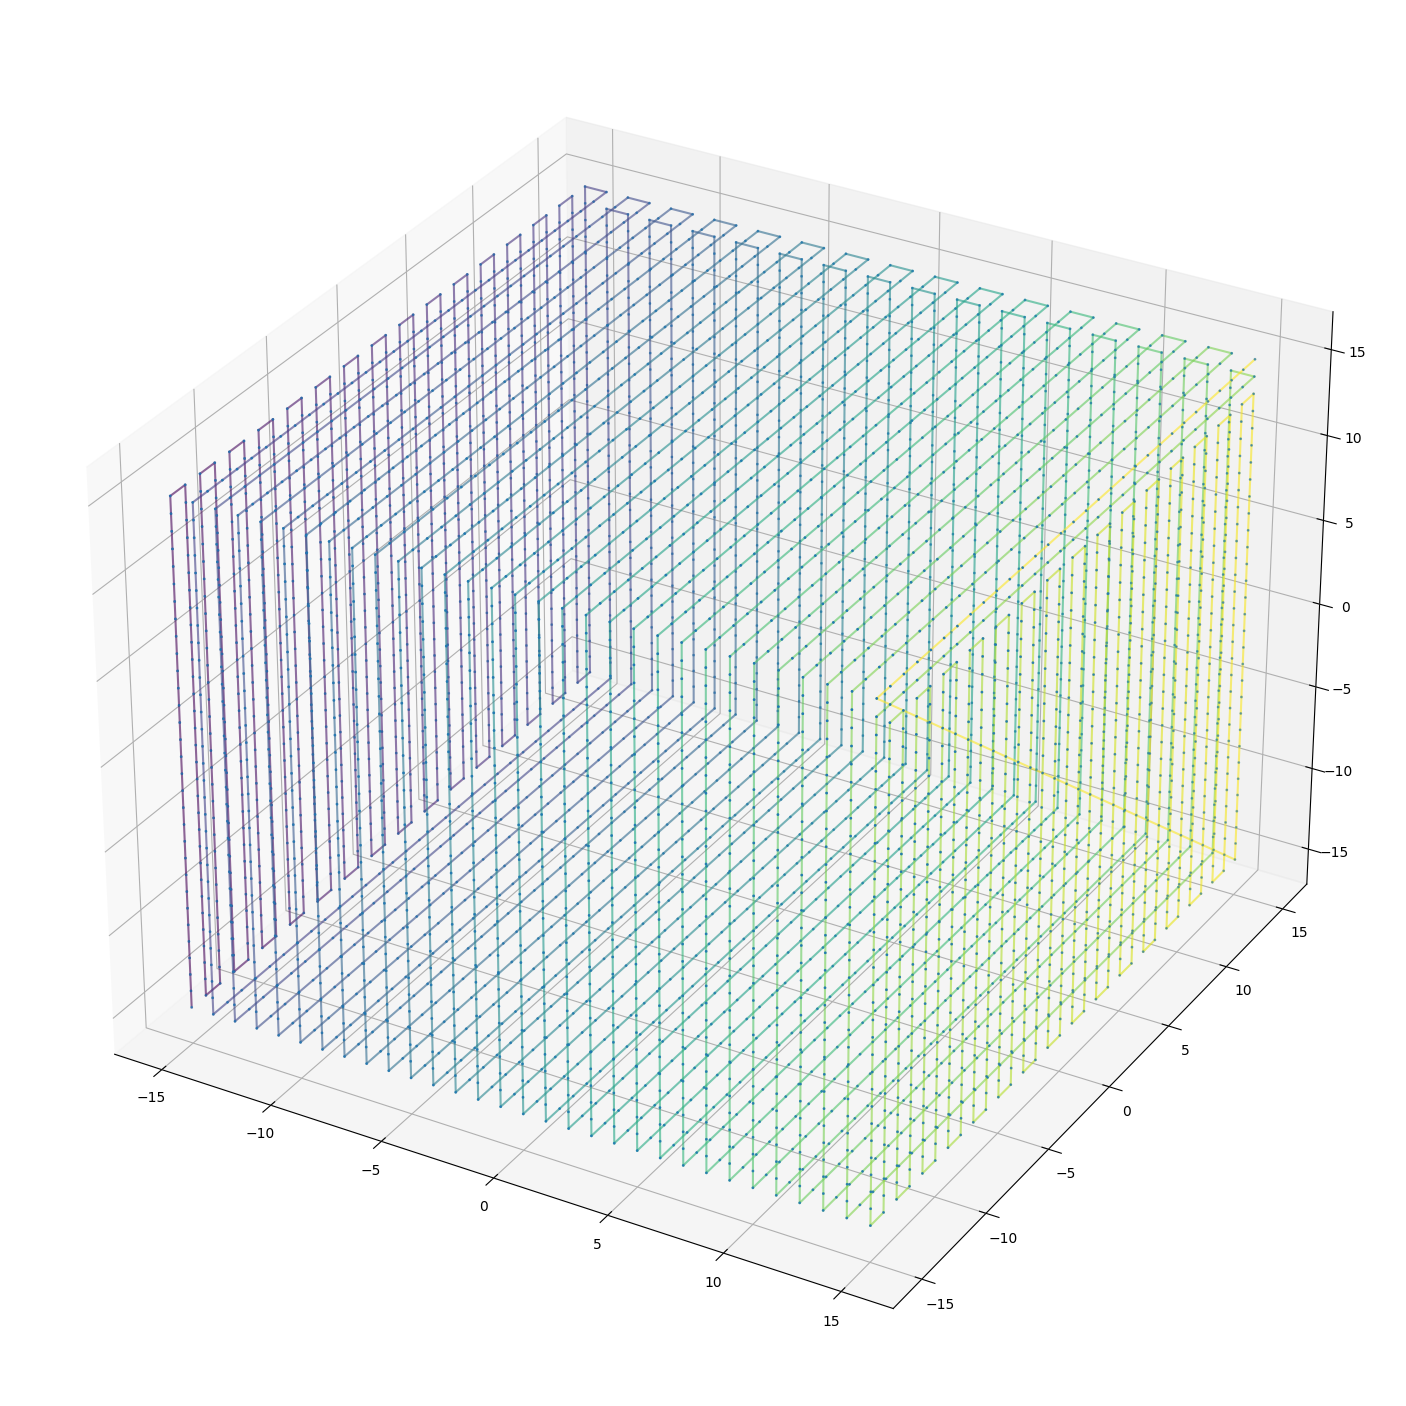

5442.426406871193


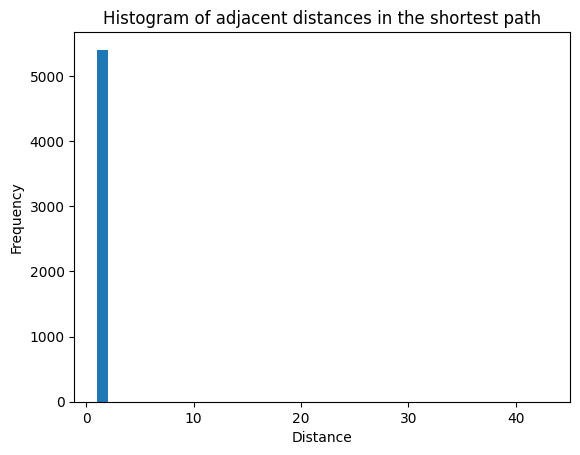

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def read_path_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        path = [int(line.strip()) for line in lines]
    return path


# 二点間の距離を計算する関数
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))


def generate_coordinates(n):
    cube_size = n
    coordinates = []
    offset = cube_size / 2
    for x in range(0, cube_size + 1):
        for y in range(0, cube_size + 1):
            for z in range(0, cube_size + 1):
                if x == 0 or x == cube_size or y == 0 or y == cube_size or z == 0 or z == cube_size:
                    coordinates.append((x - offset, y - offset, z - offset))
    return np.array(coordinates)


# グラフ上の経路をプロットする関数
def plot_path(path, coordinates):
    fig = plt.figure(figsize=(18, 18))
    ax = fig.add_subplot(111, projection='3d')

    # 頂点をプロット
    xs, ys, zs = coordinates[:, 0], coordinates[:, 1], coordinates[:, 2]
    ax.scatter(xs, ys, zs, s = 1)

     # 経路をプロット
    n = len(path) - 1
    cmap = plt.cm.get_cmap("viridis") # カラーマップを選択

    for i in range(n):
        color = cmap(i / n) # 現在の経路に応じて色を変更
        ax.plot([coordinates[path[i]][0], coordinates[path[i + 1]][0]],
                [coordinates[path[i]][1], coordinates[path[i + 1]][1]],
                [coordinates[path[i]][2], coordinates[path[i + 1]][2]], color=color, alpha=0.6)

    # グラフを表示
    plt.show()

# 隣り合う二点間の距離を計算する関数
def adjacent_distances(path, coordinates):
    distances = []
    for i in range(len(path) - 1):
        distances.append(distance(coordinates[path[i]], coordinates[path[i + 1]]))
    return distances

# ヒストグラムをプロットする関数
def plot_histogram(distances):
    #hist, bins = np.histogram(distances, bins=np.arange(min(distances), max(distances) + 1))
    # ヒストグラムを表示
    plt.hist(distances, bins=np.arange(min(distances), max(distances) + 1))

    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title('Histogram of adjacent distances in the shortest path')
    plt.show()




n = 30
coordinates = generate_coordinates(n)

filename = "path_output.txt"
path = read_path_from_file(filename)
print(path)
plot_path(path, coordinates)
# 隣り合う二点間の距離を計算
distances = adjacent_distances(path, coordinates)
print(np.sum(distances))
# ヒストグラムをプロット
plot_histogram(distances)


#distanceがルート３よりも大きい要素の数を数える　頂点数よりも十分小さい必要あり
#球だと遅い，ほかの図形でも試してみる
#C++に読み込ませる方法がうまくいっていない可能性あり
#球の場合でも，並列化すれば恐らく大丈夫
#とにもかくにも並列実行する必要あり

#球をプログラムで生成する方法で時間を試す
#ほかの図形もあわせて，遅いやつがなぜ遅いかを考える

3
[0, 0, 1]


C:\Users\ku-admin\AppData\Local\Temp\ipykernel_16700\2227805431.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("viridis") # カラーマップを選択


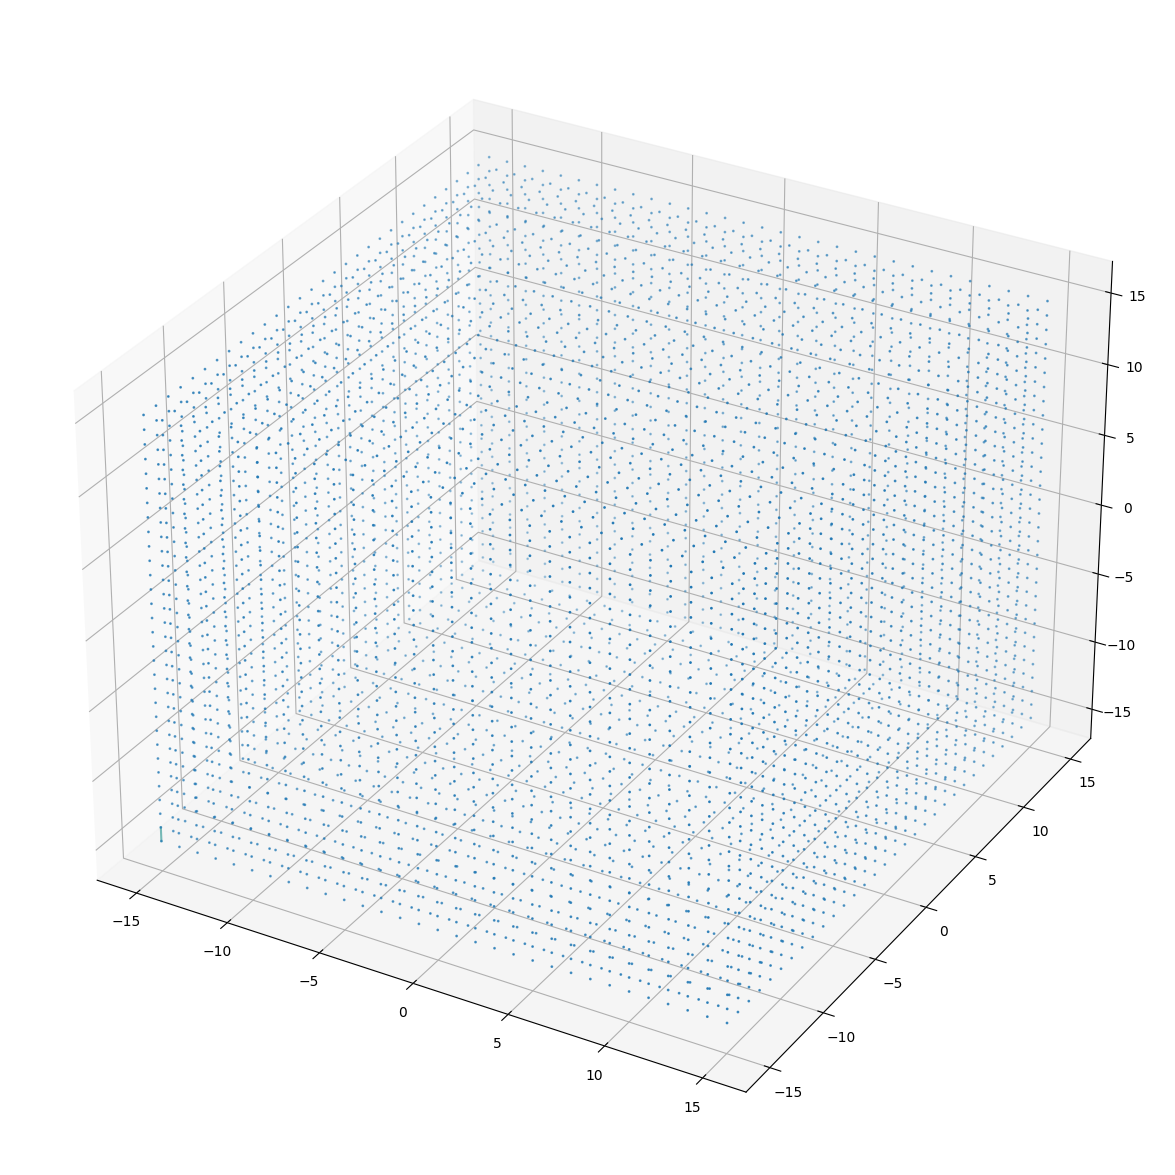

1.0


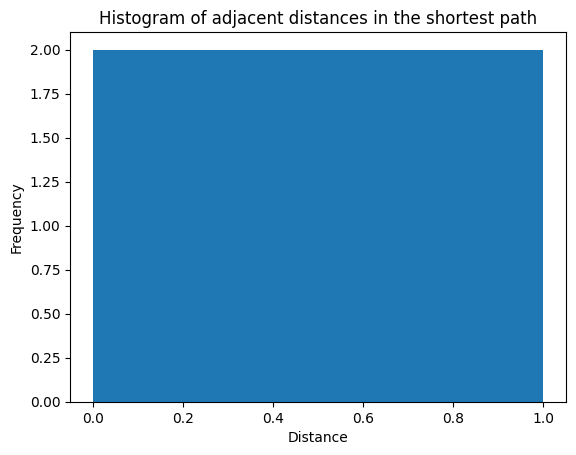

In [7]:
def read_path_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        path = [int(line.strip()) for line in lines]
    return path


# 二点間の距離を計算する関数
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))


def generate_coordinates(n):
    cube_size = n
    coordinates = []
    offset = cube_size / 2
    for x in range(0, cube_size + 1):
        for y in range(0, cube_size + 1):
            for z in range(0, cube_size + 1):
                if x == 0 or x == cube_size or y == 0 or y == cube_size or z == 0 or z == cube_size:
                    coordinates.append((x - offset, y - offset, z - offset))
    return np.array(coordinates)


# グラフ上の経路をプロットする関数
def plot_path(path, coordinates):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111, projection='3d')

    # 頂点をプロット
    xs, ys, zs = coordinates[:, 0], coordinates[:, 1], coordinates[:, 2]
    ax.scatter(xs, ys, zs, s = 1)

     # 経路をプロット
    n = len(path) - 1
    cmap = plt.cm.get_cmap("viridis") # カラーマップを選択

    for i in range(n):
        color = cmap(i / n) # 現在の経路に応じて色を変更
        ax.plot([coordinates[path[i]][0], coordinates[path[i + 1]][0]],
                [coordinates[path[i]][1], coordinates[path[i + 1]][1]],
                [coordinates[path[i]][2], coordinates[path[i + 1]][2]], color=color, alpha=0.6)

    # グラフを表示
    plt.show()

# 隣り合う二点間の距離を計算する関数
def adjacent_distances(path, coordinates):
    distances = []
    for i in range(len(path) - 1):
        distances.append(distance(coordinates[path[i]], coordinates[path[i + 1]]))
    return distances

# ヒストグラムをプロットする関数
def plot_histogram(distances):
    #hist, bins = np.histogram(distances, bins=np.arange(min(distances), max(distances) + 1))
    # ヒストグラムを表示
    plt.hist(distances, bins=np.arange(min(distances), max(distances) + 1))

    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.title('Histogram of adjacent distances in the shortest path')
    plt.show()





filename = "path_output.txt"
path = read_path_from_file(filename)
print(len(path))
print(path)
plot_path(path, coordinates)
# 隣り合う二点間の距離を計算
distances = adjacent_distances(path, coordinates)
print(np.sum(distances))
# ヒストグラムをプロット
plot_histogram(distances)
